## 회귀 (Regression)

- 일반 선형 회귀
    - 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
- 릿지 (Ridge)
    - 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
- 라쏘 (Lasso)
    - 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식
- 엘라스틱넷 (ElasticNet)
    - L2, L1 규제를 함께 결합한 모델
- 로지스틱 회귀 (Logistic Regression)
    - 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델

- RSS
    - 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w변수(회귀 계수)가 중심 변수임을 인지

### 경사하강법

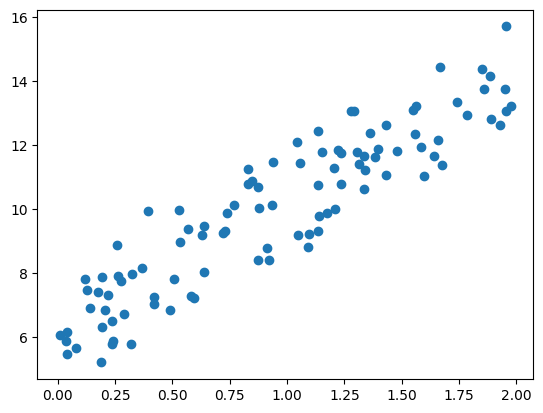

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6 식을 근사(w1 = 4, w0 = 6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [3]:
print(len(X))
X

100


array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [4]:
print(len(y))
y

100


array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

In [39]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01): # 편미분값을 조정하는 학습값
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [40]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for i in range(iters):
        # w0, w1 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0 # iter만큼 업데이트된 w1, w0 반환


In [41]:
# 오차 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N # 오차값
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0,0], w0[0,0]),'\n')

y_pred = w1[0,0]* X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162 

Gradient Descent Total Cost:0.9935


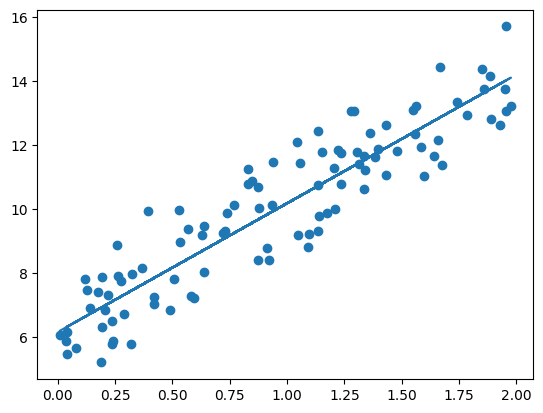

In [42]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [47]:
iters = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for i in iters:
    w1,w0 = gradient_descent_steps(X, y,iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred=w1[0,0]*X +w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:4.862, w0:5.058
Gradient Descent Total Cost:1.3596
w1:4.671, w0:5.428
Gradient Descent Total Cost:1.1733
w1:4.478, w0:5.648
Gradient Descent Total Cost:1.0873
w1:4.338, w0:5.806
Gradient Descent Total Cost:1.0422
w1:4.236, w0:5.921
Gradient Descent Total Cost:1.0186
w1:4.162, w0:6.004
Gradient Descent Total Cost:1.0062
w1:4.109, w0:6.064
Gradient Descent Total Cost:0.9996
w1:4.070, w0:6.108
Gradient Descent Total Cost:0.9962
w1:4.042, w0:6.139
Gradient Descent Total Cost:0.9944
w1:4.022, w0:6.162
Gradient Descent Total Cost:0.9935


In [48]:
for i in range(10000):
    w1,w0 = gradient_descent_steps(X, y,iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred=w1[0,0]*X +w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:0.000, w0:0.000
Gradient Descent Total Cost:105.7228
w1:0.215, w0:0.199
Gradient Descent Total Cost:97.2970
w1:0.421, w0:0.391
Gradient Descent Total Cost:89.5527
w1:0.618, w0:0.575
Gradient Descent Total Cost:82.4348
w1:0.807, w0:0.751
Gradient Descent Total Cost:75.8925
w1:0.988, w0:0.920
Gradient Descent Total Cost:69.8793
w1:1.162, w0:1.083
Gradient Descent Total Cost:64.3524
w1:1.328, w0:1.238
Gradient Descent Total Cost:59.2724
w1:1.487, w0:1.388
Gradient Descent Total Cost:54.6032
w1:1.639, w0:1.532
Gradient Descent Total Cost:50.3115
w1:1.785, w0:1.670
Gradient Descent Total Cost:46.3668
w1:1.925, w0:1.802
Gradient Descent Total Cost:42.7410
w1:2.058, w0:1.929
Gradient Descent Total Cost:39.4083
w1:2.186, w0:2.051
Gradient Descent Total Cost:36.3450
w1:2.309, w0:2.168
Gradient Descent Total Cost:33.5293
w1:2.426, w0:2.281
Gradient Descent Total Cost:30.9412
w1:2.539, w0:2.389
Gradient Descent Total Cost:28.5621
w1:2.646, w0:2.492
Gradient Descent Total Cost:26.3753
w1:2.749,

KeyboardInterrupt: 

In [43]:
# 샘플링으로 데이터르르 추출하여 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for i in range(iters):
        np.random.seed(i)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        # 랜덤순열 만들기
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 미니배치 임의 추출
        # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [44]:
np.random.permutation(X.shape[0])

array([18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74, 79,  1, 45, 28, 60, 52, 25, 39, 97, 44, 16, 55, 83, 49,
       22, 70, 47,  4, 82, 94, 53, 66, 26, 84, 31, 63,  8, 75, 98, 57, 71,
       99, 86, 96, 69, 24, 30, 13, 40, 56, 68, 95, 81, 19, 38, 91, 54, 32,
       51, 85, 11, 89, 90, 36, 65, 88, 41, 14, 27, 50, 20, 46, 67, 35, 62,
        2, 59, 23, 58, 43, 10,  0, 73, 21, 77, 42,  3, 93, 48, 34])

In [45]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1", round(w1[0,0],3), "w0",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1 4.028 w0 6.156
Stochastic Gradient Descent Total Cost: 0.9937


In [51]:
for i in range(10000):
    w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred = w1[0,0]* X + w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient Descent Total Cost:0.9937
w1:4.028, w0:6.156
Gradient 

KeyboardInterrupt: 

## sklearn.linear_model.SGDRegressor
* class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)[source]
